## Data Visualization


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Load the processed master dataset
df = pd.read_csv('output/worldcup_master.csv')

**Figure 1. Stage Score Distribution by Confederation**


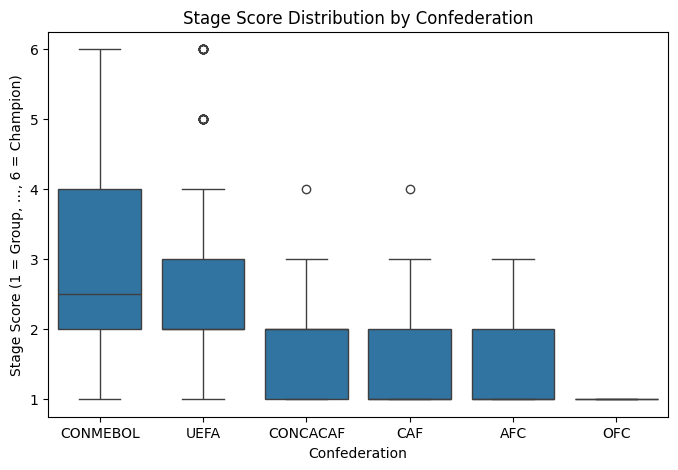

In [36]:
# 1)  Stage Score Distribution by Confederation
plt.figure(figsize=(8,5))
sns.boxplot(x='confed', y='stage_score', data=df)
plt.title('Stage Score Distribution by Confederation')
plt.xlabel('Confederation')
plt.ylabel('Stage Score (1 = Group, …, 6 = Champion)')
plt.show()

**Figure 2. Average Win Rate by Confederation**

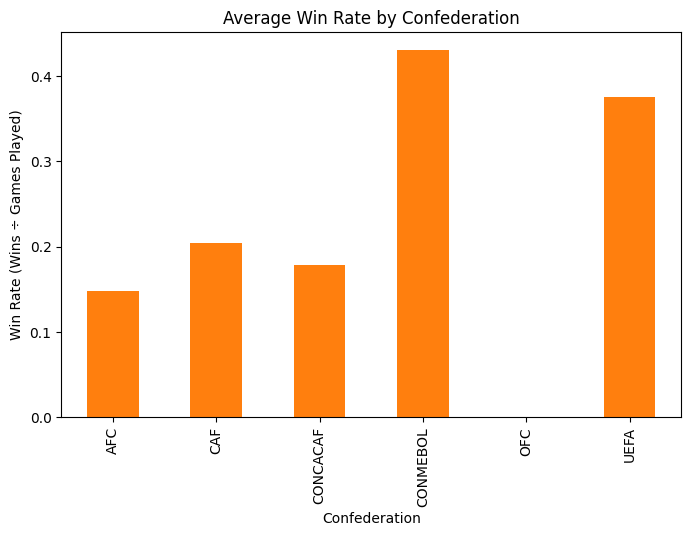

In [37]:
# 2) Average Win Rate by Confederation
avg_win = df.groupby('confed')['win_rate'].mean()
plt.figure(figsize=(8,5))
avg_win.plot(kind='bar', color='C1')
plt.title('Average Win Rate by Confederation')
plt.xlabel('Confederation')
plt.ylabel('Win Rate (Wins ÷ Games Played)')
plt.show()

**Figure 3. Stacked Histogram of GD per Game by Confederation**

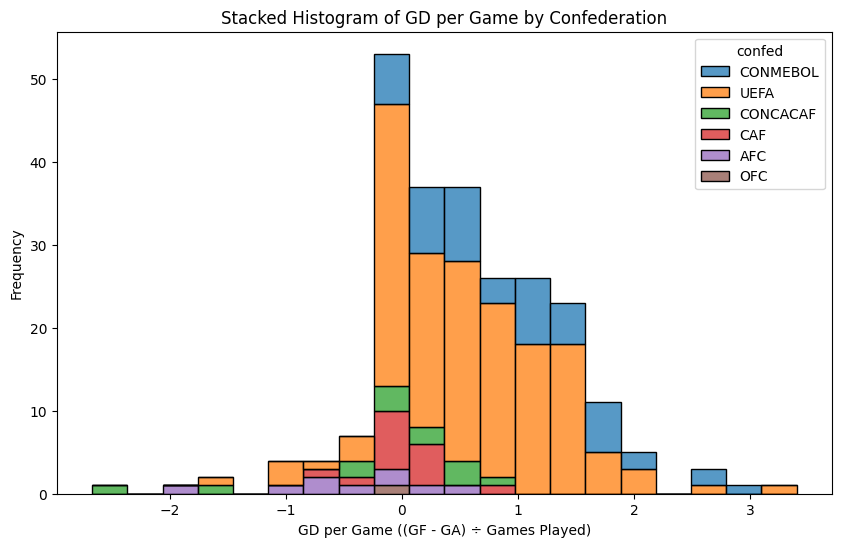

In [38]:

# 3) Stacked histogram: GD per Game by Confederation
plt.figure(figsize=(10,6))
sns.histplot(
    data=df,
    x='gd_per_game',
    hue='confed',
    multiple='stack',
    bins=20
)
plt.title('Stacked Histogram of GD per Game by Confederation')
plt.xlabel('GD per Game ((GF - GA) ÷ Games Played)')
plt.ylabel('Frequency')
plt.show()


**Figure 4. Total Stage Score by Confederation per Tournament**

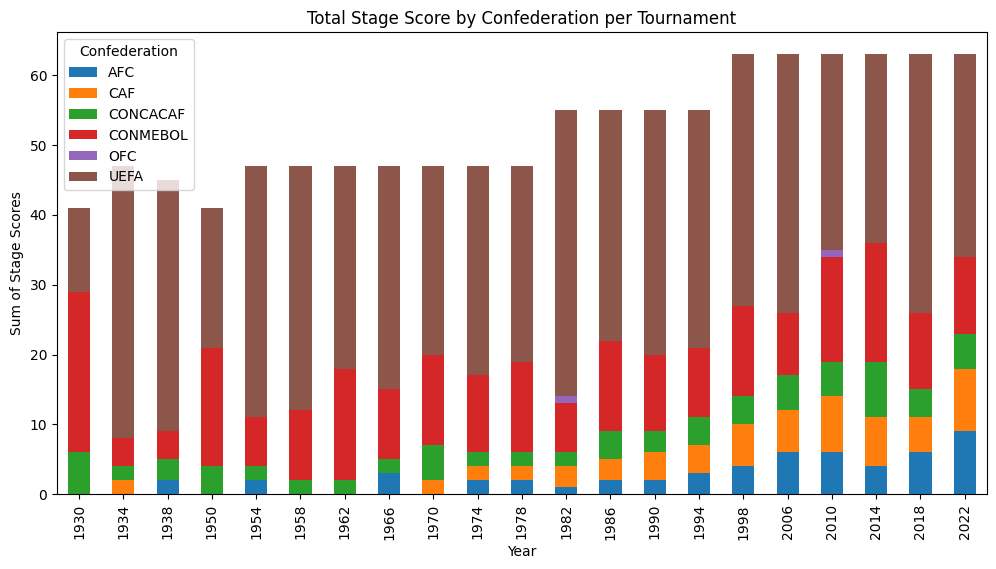

In [39]:
# 4)Total Stage Score by Confederation per Tournament
df = pd.read_csv('output/worldcup_master.csv')

agg = df.groupby(['year','confed'])['stage_score'].sum().unstack().fillna(0)

agg.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Total Stage Score by Confederation per Tournament')
plt.xlabel('Year')
plt.ylabel('Sum of Stage Scores')
plt.legend(title='Confederation')
plt.show()

**Figure 5. Average Stage Score Over Time by Confederation**

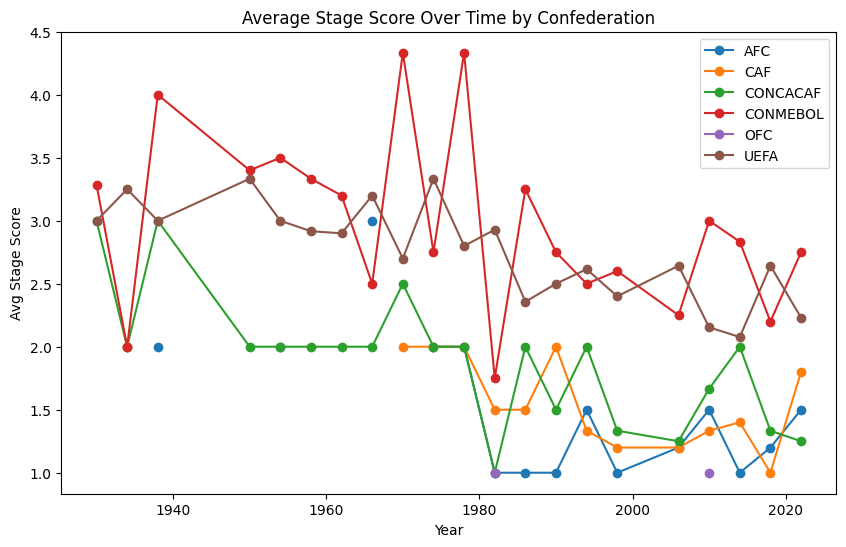

In [40]:
# 5)  Average Stage Score Over Time by Confederation
agg_mean = df.groupby(['year','confed'])['stage_score'] \
             .mean().unstack()
plt.figure(figsize=(10,6))
for conf in agg_mean.columns:
    plt.plot(agg_mean.index,
             agg_mean[conf],
             marker='o',
             label=conf)
plt.title('Average Stage Score Over Time by Confederation')
plt.xlabel('Year')
plt.ylabel('Avg Stage Score')
plt.legend()
plt.show()
